In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
path= r'C:\Users\solom\Downloads\Machine Learning- Project'

In [4]:
df_weather = pd.read_csv(os.path.join(path, 'Manipulated Data', 'Weather_station_Data_Scaled.csv'))

In [5]:
df_weather

,Unnamed: 0.1,Unnamed: 0,ID,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,22945,22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,22946,22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,22947,22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,22948,22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [6]:

df_pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [7]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#Reduce to just the temperature variables (excluding Gdansk, Stockholm Roma,Tours)
df = df_weather[['DATE', 'MONTH','BASEL_humidity','BASEL_precipitation','BASEL_sunshine',        
 'BELGRADE_humidity','BELGRADE_precipitation','BELGRADE_sunshine',
 'BUDAPEST_humidity', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine',
 'DEBILT_humidity','DEBILT_precipitation','DEBILT_sunshine',
 'DUSSELDORF_humidity','DUSSELDORF_precipitation','DUSSELDORF_sunshine',
 'HEATHROW_humidity','HEATHROW_precipitation','HEATHROW_sunshine',
 'KASSEL_humidity','KASSEL_precipitation','KASSEL_sunshine',
 'LJUBLJANA_humidity','LJUBLJANA_precipitation','LJUBLJANA_sunshine',
 'MAASTRICHT_humidity','MAASTRICHT_precipitation','MAASTRICHT_sunshine',
 'MADRID_humidity','MADRID_precipitation','MADRID_sunshine',
 'MUNCHENB_humidity','MUNCHENB_precipitation','MUNCHENB_sunshine',
 'OSLO_humidity','OSLO_precipitation','OSLO_sunshine',
 'SONNBLICK_humidity','SONNBLICK_precipitation','SONNBLICK_sunshine',   
 'VALENTIA_humidity','VALENTIA_precipitation','VALENTIA_sunshine']].copy()

In [9]:
#Create an 'X' matrix and y matrix by dropping the unneeded columns.
X = df.drop(['DATE','MONTH'], axis=1)
y = df_pleasant.drop(['DATE'], axis=1)

In [10]:
print(X.shape)
print(y.shape)

(22950, 42)
(22950, 15)


In [11]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 42)
(5738, 42)
(17212, 15)
(5738, 15)


In [13]:
X_train[:10]

,BASEL_humidity,BASEL_precipitation,BASEL_sunshine,BELGRADE_humidity,BELGRADE_precipitation,BELGRADE_sunshine,BUDAPEST_humidity,BUDAPEST_precipitation,BUDAPEST_sunshine,DEBILT_humidity,...,MUNCHENB_sunshine,OSLO_humidity,OSLO_precipitation,OSLO_sunshine,SONNBLICK_humidity,SONNBLICK_precipitation,SONNBLICK_sunshine,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_sunshine
8196,-0.619294,-0.325270,0.535359,-1.090636,-0.371315,0.630523,-1.195710,-0.344984,0.616122,-1.576766,...,1.520567,-1.589861,-0.455841,1.738473,0.614023,-0.412895,0.336399,0.058712,-0.159420,-0.408784
20472,0.555086,-0.265148,-1.065304,-0.163965,-0.371315,0.445701,-0.010098,-0.344984,-0.004191,0.052375,...,-1.098059,0.917246,-0.455841,-0.193703,-0.968554,-0.510467,0.791131,-0.081896,-0.005560,-0.018319
18269,0.735760,-0.305229,-0.926116,1.831941,0.040497,-1.217691,-0.010098,-0.206286,-1.344065,0.765124,...,-0.158039,0.227792,-0.414064,-1.018677,0.105338,-0.329262,-0.959586,1.042971,-0.455304,-0.078390
7713,-0.167609,-0.445514,-0.253374,1.618094,-0.351705,-1.333204,-1.013308,-0.344984,0.640934,1.070588,...,-0.605668,-0.649696,-0.455841,-0.020024,0.218379,-0.663795,-0.004649,1.183580,1.379179,-1.039536
21958,-0.619294,1.919289,-0.949314,-0.021400,-0.351705,-0.293584,-0.010098,0.163575,-0.004191,0.561481,...,-0.292328,-1.025762,-0.455841,0.761530,-0.459869,0.158598,0.768394,-0.081896,-0.005560,-0.018319
11464,-1.070979,-0.445514,1.277695,-0.591659,-0.371315,0.607420,-1.104509,-0.344984,0.516872,-0.965838,...,0.849125,-2.655382,-0.455841,1.217437,0.500982,1.301585,0.927550,0.902363,-0.490810,2.714940
3984,0.374412,-0.445514,-0.230176,1.047835,-0.371315,-1.333204,-0.010098,-0.344984,-1.344065,0.663302,...,-0.851863,1.544023,0.400579,-1.018677,-2.381570,-0.663795,0.518292,1.042971,-0.455304,-0.078390
4752,1.639129,-0.445514,-1.065304,1.903224,0.158157,-1.333204,1.813922,-0.160053,-1.344065,1.681515,...,-1.053296,0.791891,-0.455841,-1.018677,0.727065,-0.245629,-1.073269,1.886622,-0.490810,-1.039536
11092,0.645423,0.556521,0.210586,-1.518330,-0.371315,0.653625,0.445907,-0.344984,0.740184,-0.151268,...,0.021012,-0.649696,-0.455841,1.608214,0.444461,-0.454712,-0.141069,0.902363,0.420514,-0.018319
21377,-1.341989,-0.445514,2.066427,-0.021400,-0.273265,-0.016352,-0.010098,-0.344984,-0.004191,-0.762196,...,1.789144,-0.900407,-0.079852,0.522722,0.614023,-0.663795,0.609238,-0.081896,-0.005560,-0.018319


In [14]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-0.61660315 -0.32190663  0.53047535 -1.0873307  -0.3648549   0.62674616
  -1.19324141 -0.34723301  0.61216069 -1.57966892 -0.49616206  1.61507224
  -1.09820744 -0.49793609  2.36344774 -0.01072639  0.42319243  0.10450987
  -1.11148054 -0.50339984  1.16221595  0.00693921 -0.14776625 -0.17249326
  -0.80258793 -0.47544327  2.28155683 -0.59490159 -0.31615621 -1.09345731
  -1.1445265  -0.45417599  1.5182592  -1.58751152 -0.45571496  1.73299754
   0.6164936  -0.41143954  0.33463499  0.05979683 -0.14688046 -0.41155097]
 [ 0.55778807 -0.2621358  -1.06970594 -0.16206147 -0.3648549   0.44177952
  -0.00491251 -0.34723301 -0.00864482  0.0513361  -0.49616206 -0.53742895
  -0.06567319 -0.49793609  0.83266827 -0.58498022 -0.43468322  0.30420169
  -0.00772199 -0.00807895 -0.01066284  0.5484315  -0.40855383 -0.72088203
  -0.35635719 -0.47544327  0.84699805  0.64712617 -0.31615621 -0.82808845
   0.14387577 -0.45417599 -1.10656262  0.91551127 -0.45571496 -0.19362181
  -0.9673184  -0.50945999  0.78949355

In [15]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [16]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [17]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.41198001394376016
0.4166957127919136


C:\Users\solom\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


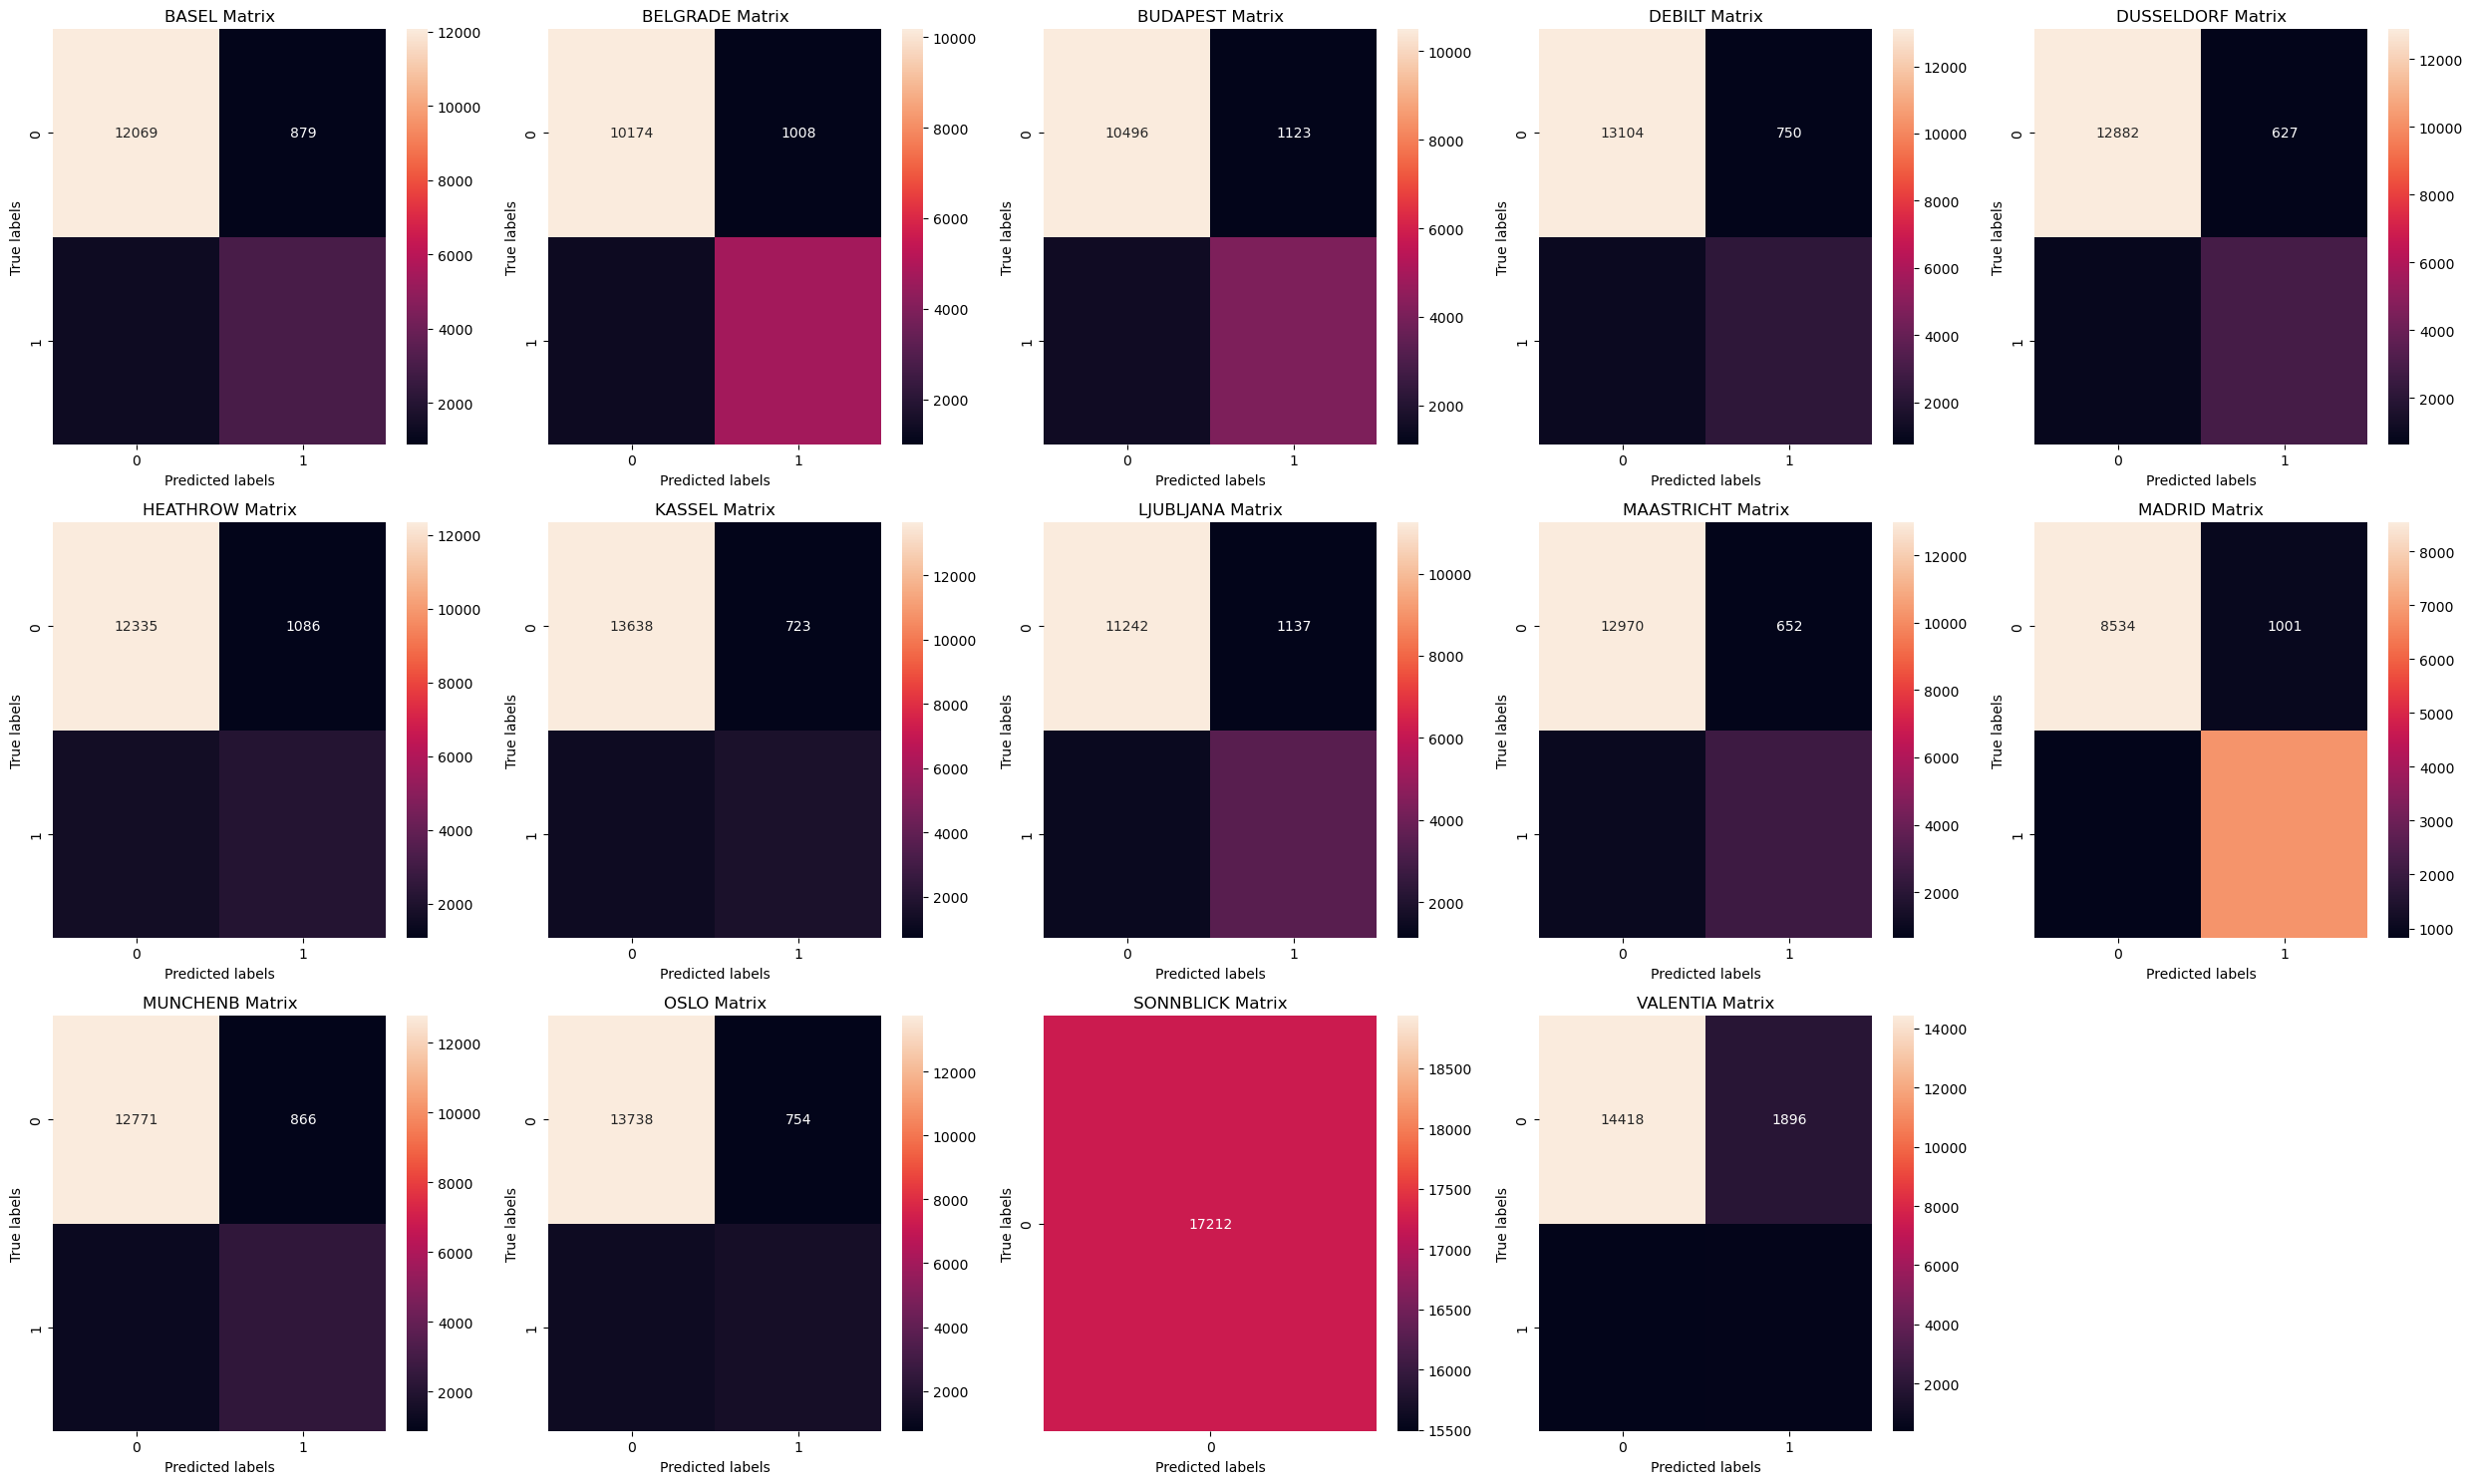

In [18]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']

num_locations = len(locations)

n_rows = (num_locations // 5) + 1
figure, ax = plt.subplots(n_rows, 5, figsize=(25, 5 * n_rows))

count = 0
for i in range(n_rows):
    for j in range(5):
        if count < num_locations:
            name = locations[count]
            cm = confusion_matrix(y_train.loc[:, name + key], y_pred[:, count])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Matrix')
            count += 1
        else:
            ax[i, j].axis('off') 

plt.tight_layout()
plt.savefig(os.path.join(path, 'Visualization', 'ANN1-Train.png'))
plt.show()

In [19]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (10, 5) is two hidden layers with 10 and 5 nodes 

mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [20]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4215663490587962
0.42575810386894386


C:\Users\solom\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


IndexError: list index out of range

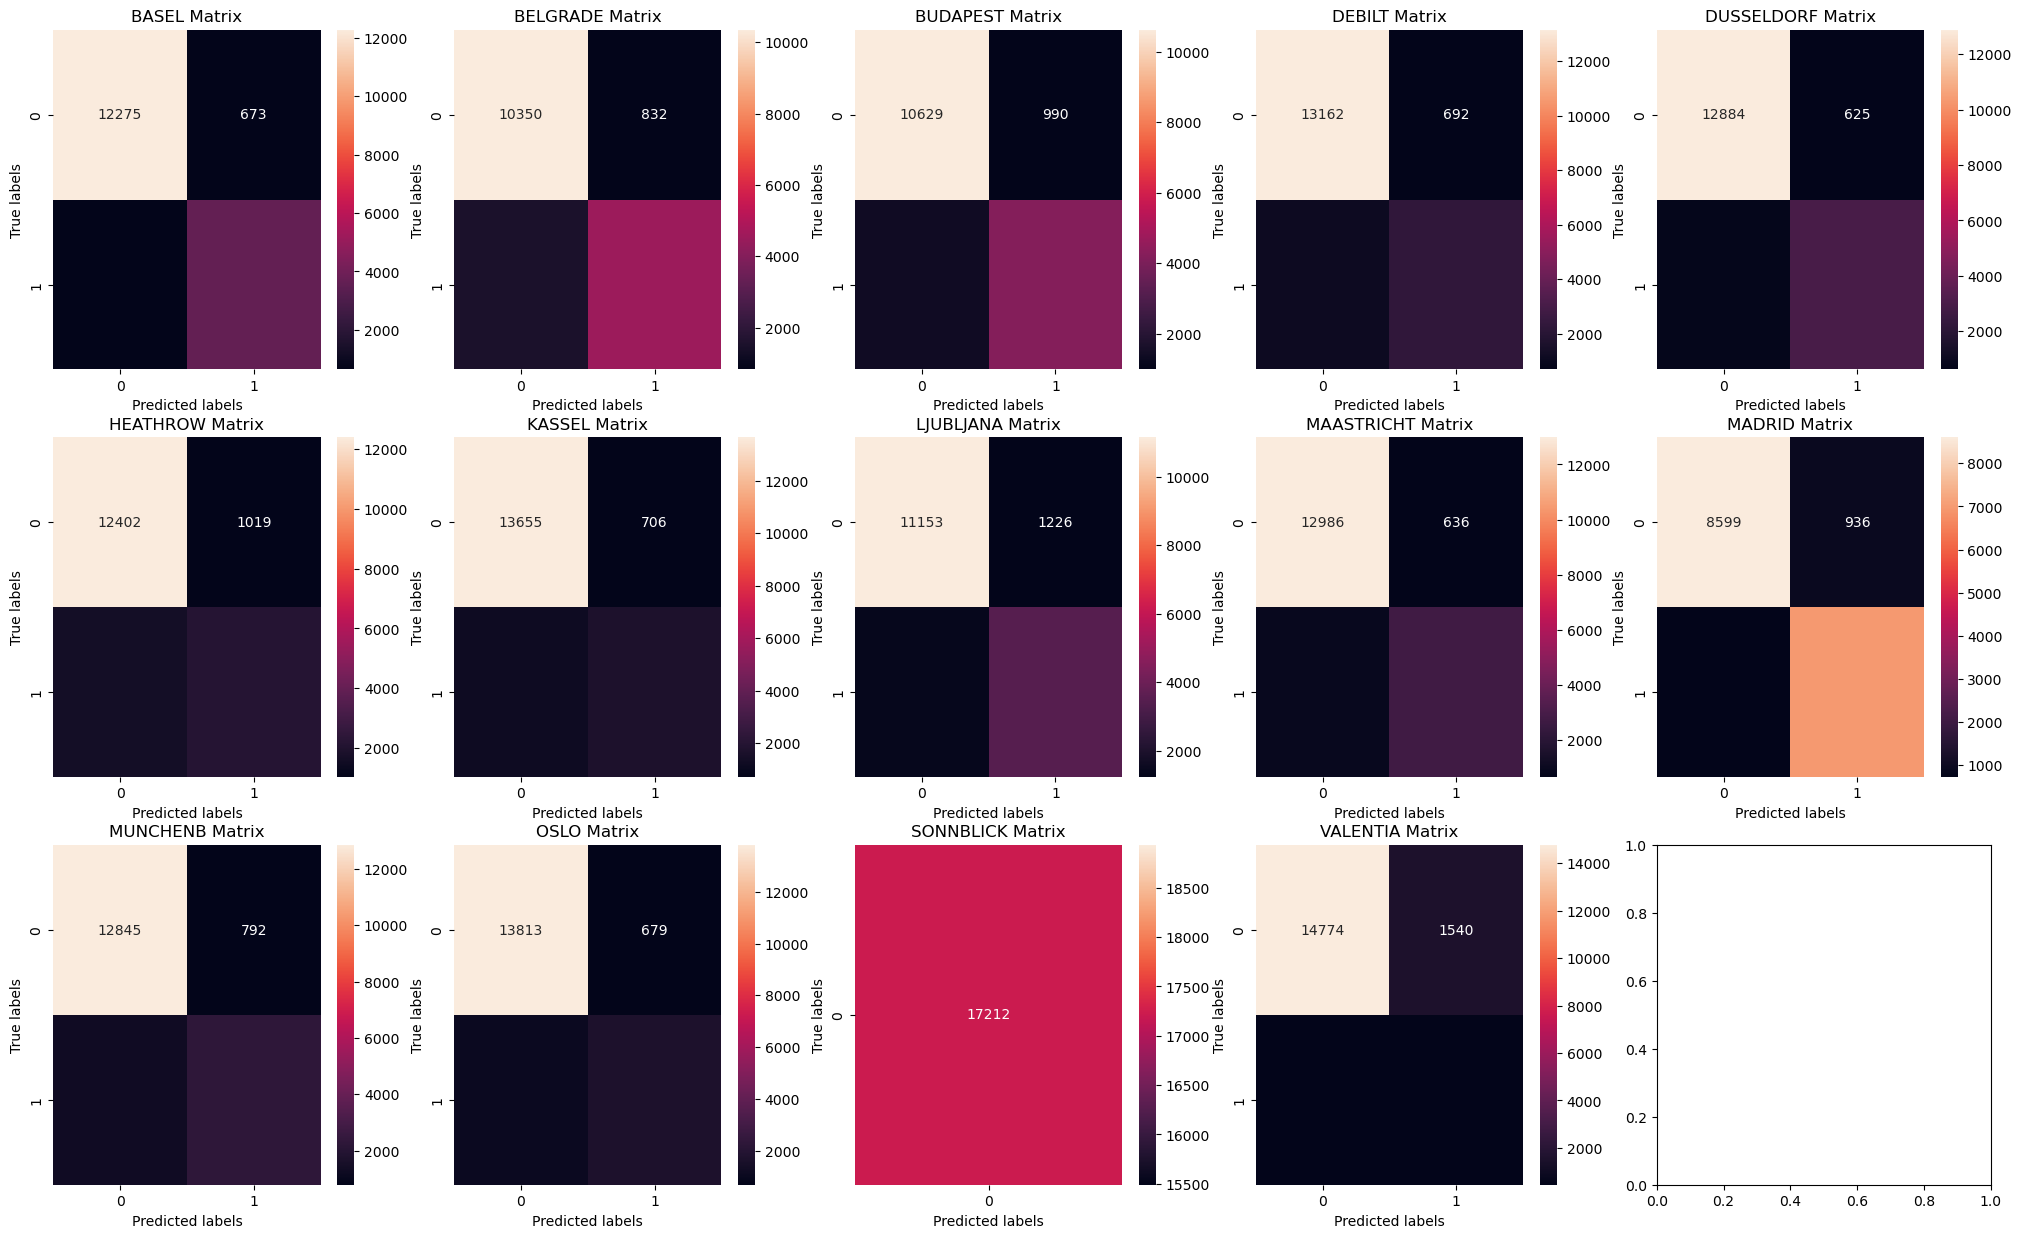

In [21]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig(os.path.join(path,'Visualization', 'ANN2-Train.png'))

In [ ]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig(os.path.join(path,'Visualization', 'ANN2-Test.png'))

In [ ]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. 
#and (80, 60, 60) is three hidden layers with 80, 60, and 60 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(80, 60, 60), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

In [ ]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

In [ ]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig(os.path.join(path,'Visualization', 'ANN3-Train.png'))

In [ ]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig(os.path.join(path,'Visualization', 'ANN3-Test.png'))

In [ ]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes.
#and (80, 60, 60) is three hidden layers with 80, 60, and 66 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(80, 60, 60), max_iter=1000, tol=0.0003)
#Fit the data to the model
mlp.fit(X_train, y_train)

In [ ]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

In [ ]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig(os.path.join(path,'Visualization', 'ANN4-Train.png'))

In [ ]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig(os.path.join(path,'Visualization', 'ANN4-Test.png'))